In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate
import xarray as xr
%matplotlib inline

In [2]:
rpndata = xr.open_dataset('/data/dlatorne/MEOPAR/GEMLAM-netcdf/2014110206.nc')
opsdata = xr.open_dataset('/results/forcing/atmospheric/GEM2.5/operational/ops_y2014m11d02.nc')

In [3]:
rpndata

<xarray.Dataset>
Dimensions:       (time_counter: 21, x: 675, y: 476, z: 1)
Coordinates:
  * time_counter  (time_counter) datetime64[ns] 2014-11-02 ... 2014-11-02T23:00:00
Dimensions without coordinates: x, y, z
Data variables:
    FB            (time_counter, z, y, x) float32 ...
    depth         (z) float32 ...
    nav_lat       (y, x) float32 ...
    nav_lon       (y, x) float32 ...
    NT            (time_counter, z, y, x) float32 ...
    PN            (time_counter, z, y, x) float32 ...
    RT            (time_counter, z, y, x) float32 ...
    TD            (time_counter, z, y, x) float32 ...
    TT            (time_counter, z, y, x) float32 ...
    UU            (time_counter, z, y, x) float32 ...
    VV            (time_counter, z, y, x) float32 ...
Attributes:
    history:                   Mon Feb  4 17:18:58 2019: ncrcat -4 -L4 -O -o ...
    nco_openmp_thread_number:  1

In [4]:
IST, IEN = 110, 365+1
JST, JEN = 20, 285+1
opsdata

<xarray.Dataset>
Dimensions:       (time_counter: 24, x: 256, y: 266)
Coordinates:
  * time_counter  (time_counter) datetime64[ns] 2014-11-02 ... 2014-11-02T23:00:00
  * x             (x) float64 0.0 2.5e+03 5e+03 ... 6.325e+05 6.35e+05 6.375e+05
  * y             (y) float64 0.0 2.5e+03 5e+03 ... 6.575e+05 6.6e+05 6.625e+05
Data variables:
    atmpres       (time_counter, y, x) float32 ...
    nav_lat       (y, x) float64 ...
    nav_lon       (y, x) float64 ...
    precip        (time_counter, y, x) float32 ...
    qair          (time_counter, y, x) float32 ...
    solar         (time_counter, y, x) float32 ...
    tair          (time_counter, y, x) float32 ...
    therm_rad     (time_counter, y, x) float32 ...
    u_wind        (time_counter, y, x) float32 ...
    v_wind        (time_counter, y, x) float32 ...
Attributes:
    Conventions:          CF-1.0
    GRIB2_grid_template:  20
    NCO:                  4.4.2
    History:              Thu Dec 31 12:21:07 2015: ncatted -O -a tim

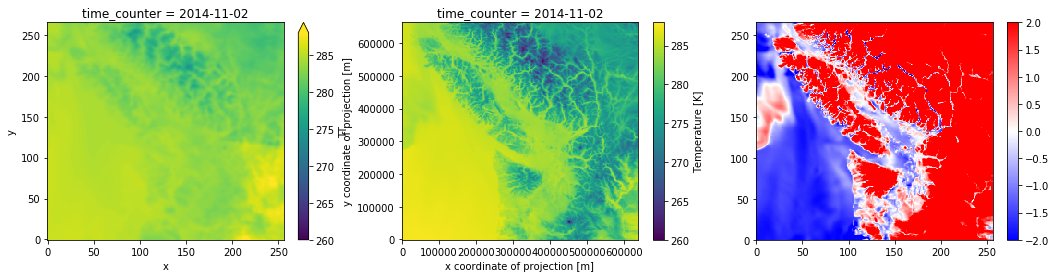

In [5]:
fig, axs = plt.subplots(1, 3, figsize=(18, 4))
(rpndata['TT'][0, 0, JST:JEN, IST:IEN]+273.15).plot(ax=axs[0], vmax=288, vmin=260)
opsdata['tair'][0].plot(ax=axs[1], vmax=288, vmin=260)
rpn_data_TT = rpndata['TT'][0, 0, JST:JEN, IST:IEN]+273.15
ops_data_tair = opsdata['tair'][0]
mesh = axs[2].pcolormesh(rpn_data_TT - ops_data_tair, vmax=2, vmin=-2, cmap='bwr')
fig.colorbar(mesh, ax=axs[2])

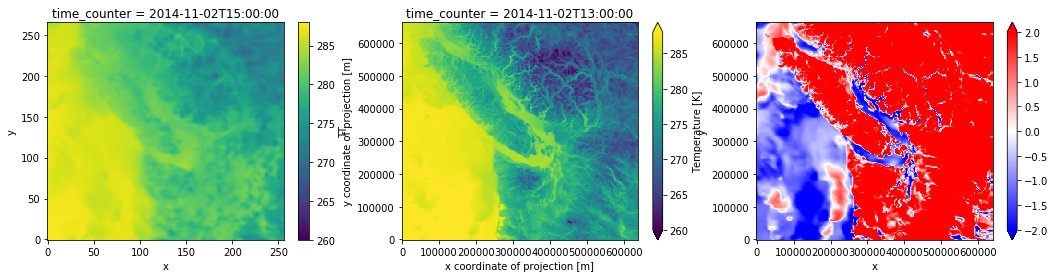

In [6]:
fig, axs = plt.subplots(1, 3, figsize=(18, 4))
(rpndata['TT'][13, 0, JST:JEN, IST:IEN]+273.15).plot(ax=axs[0], vmax=288, vmin=260)
opsdata['tair'][13].plot(ax=axs[1], vmax=288, vmin=260)
(rpndata['TT'][13, 0, JST:JEN, IST:IEN]+273.15-opsdata['tair'][13]).plot(ax=axs[2], vmax=2, vmin=-2, cmap='bwr');

<xarray.DataArray ()>
array(12.762277)


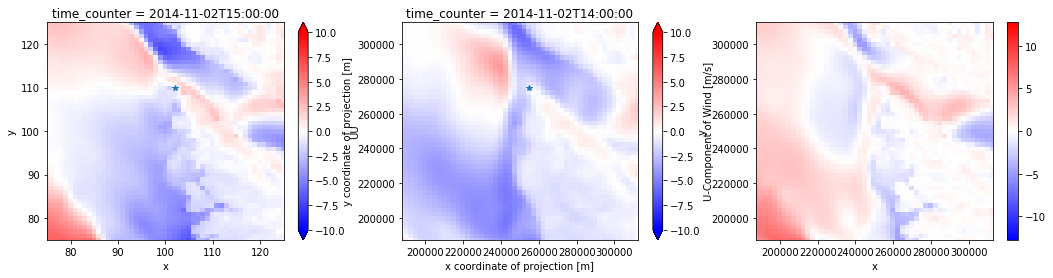

In [7]:
ir, io = 13, 14
ic, jc = 4, -2
fig, axs = plt.subplots(1, 3, figsize=(18, 4))
(rpndata['UU'][ir, 0, JST+jc:JEN+jc, IST+ic:IEN+ic]*0.514444).plot(ax=axs[0], vmax=10, vmin=-10, cmap='bwr')
axs[0].plot(102, 110, '*')
opsdata['u_wind'][io].plot(ax=axs[1], vmax=10, vmin=-10, cmap='bwr')
axs[1].plot(102*2500, 110*2500, '*')
(rpndata['UU'][ir, 0, JST+jc:JEN+jc, IST+ic:IEN+ic]*0.514444-opsdata['u_wind'][io]).plot(ax=axs[2], cmap='bwr')
axs[0].set_xlim(75, 125)
axs[1].set_xlim(75*2500, 125*2500)
axs[2].set_xlim(75*2500, 125*2500)
axs[0].set_ylim(75, 125)
axs[1].set_ylim(75*2500, 125*2500)
axs[2].set_ylim(75*2500, 125*2500)
print (np.max((rpndata['UU'][ir, 0, JST+jc:JEN+jc, IST+ic:IEN+ic]*0.514444-opsdata['u_wind'][io])))

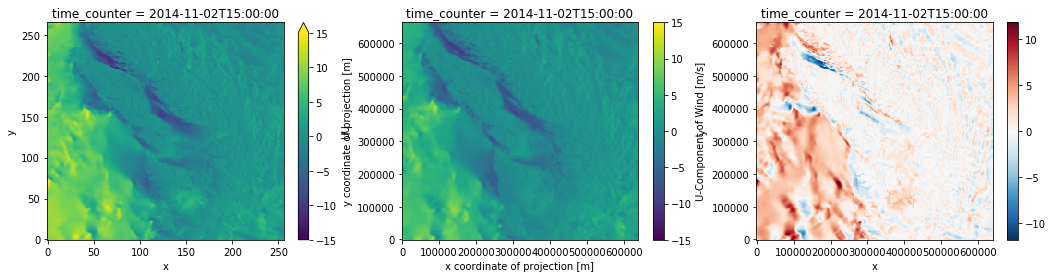

In [8]:
ir, io = 13, 15
fig, axs = plt.subplots(1, 3, figsize=(18, 4))
(rpndata['UU'][ir, 0, JST:JEN, IST:IEN]*0.514444).plot(ax=axs[0], vmax=15, vmin=-15)
opsdata['u_wind'][io].plot(ax=axs[1], vmax=15, vmin=-15);
(rpndata['UU'][ir, 0, JST:JEN, IST:IEN]*0.514444-opsdata['u_wind'][io]).plot(ax=axs[2]);

<xarray.DataArray ()>
array(187.69493, dtype=float32)
Coordinates:
    time_counter  datetime64[ns] 2014-11-02T15:00:00


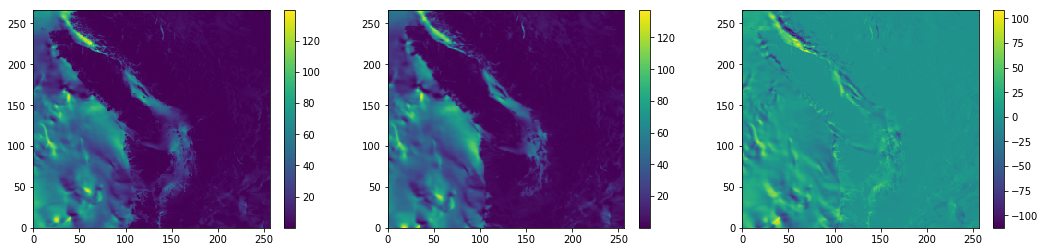

In [9]:
ir, io = 13, 15
ic, jc = 6, -6
corr=0.7
rspeed = ((rpndata['UU'][ir, 0, JST+jc:JEN+jc, IST+ic:IEN+ic]*0.514444)**2 +
          (rpndata['VV'][ir, 0, JST+jc:JEN+jc, IST+ic:IEN+ic]*0.514444)**2)*corr
ospeed = opsdata['u_wind'][io]**2 + opsdata['v_wind'][io]**2
print(np.mean((rspeed-ospeed)**2))

fig, axs = plt.subplots(1, 3, figsize=(18, 4))
mesh = axs[0].pcolormesh(rspeed)
fig.colorbar(mesh, ax=axs[0])
mesh = axs[1].pcolormesh(ospeed)
fig.colorbar(mesh, ax=axs[1])
mesh = axs[2].pcolormesh(rspeed-ospeed)
fig.colorbar(mesh, ax=axs[2])


In [10]:
table = [[4, -2, 13, 15, 1, 568],
         [4, -2, 13, 14, 1, 703],
         [4, -2, 13, 13, 1, 719],
         [3, -2, 13, 15, 1, 581],
         [5, -2, 13, 15, 1, 559],
         [5, -3, 13, 15, 1, 542],
         [6, -3, 13, 15, 1, 537],
         [6, -13, 13, 15, 1, 552],
        [6, -11, 13, 15, 1, 512],
         [6, -11, 13, 15, 0.9, 366],
          [6, -11, 13, 15, 0.8, 260],
         [6, -11, 13, 15, 0.7, 194],
         [6, -6, 13, 15, 0.7, 187],
         [10, -6, 13, 15, 0.7, 227],
         [0, -6, 13, 15, 0.7, 268]
        ]
         

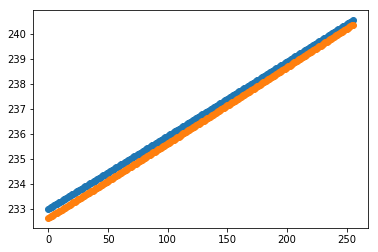

In [11]:
plt.plot(opsdata['nav_lon'][0], 'o-')
plt.plot(opsdata['nav_lon'][50], 'o-')
#plt.plot(rpndata['nav_lon'][50+JST, IST:IEN], 'x-')
#plt.plot(rpndata['nav_lon'][50, IST:IEN], 'x-')

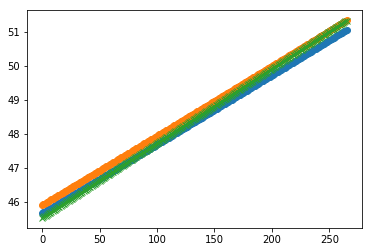

In [12]:
plt.plot(opsdata['nav_lat'][:,0], 'o-')
plt.plot(opsdata['nav_lat'][:,50], 'o-')
plt.plot(rpndata['nav_lat'][JST:JEN, IST], 'x-')
#plt.plot(rpndata['nav_lon'][50, IST:IEN], 'x-')

(266, 256) (266, 256)


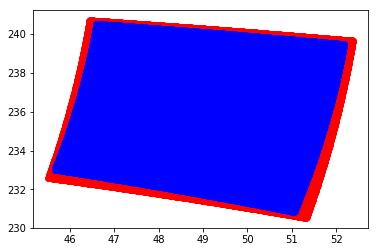

In [13]:
plt.plot(rpndata['nav_lat'][JST:JEN, IST:IEN], rpndata['nav_lon'][JST:JEN, IST:IEN], 'or');
plt.plot(opsdata['nav_lat'], opsdata['nav_lon'], 'ob');
print (rpndata['nav_lat'][JST:JEN, IST:IEN].shape, opsdata['nav_lat'].shape)

In [237]:
ir, io = 13, 15
x = np.ndarray.flatten(np.array(rpndata['nav_lon'][JST:JEN, IST:IEN]))
y = np.ndarray.flatten(np.array(rpndata['nav_lat'][JST:JEN, IST:IEN]))
z = np.ndarray.flatten(np.array(rpndata['UU'][ir, 0, JST:JEN, IST:IEN]**2 +
                               rpndata['VV'][ir, 0, JST:JEN, IST:IEN]**2))
#f = interpolate.interp2d(x, y, z, kind='linear')

In [238]:
im, ix = 0, -1

xnew = opsdata['nav_lon'][im:ix, im:ix]
ynew = opsdata['nav_lat'][im:ix, im:ix]
points = np.array( (x,y)).T
print (points.shape)

muu = interpolate.griddata(points, z, (xnew, ynew))

(68096, 2)


<xarray.DataArray ()>
array(12425.946265)
Coordinates:
    time_counter  datetime64[ns] 2014-11-02T15:00:00


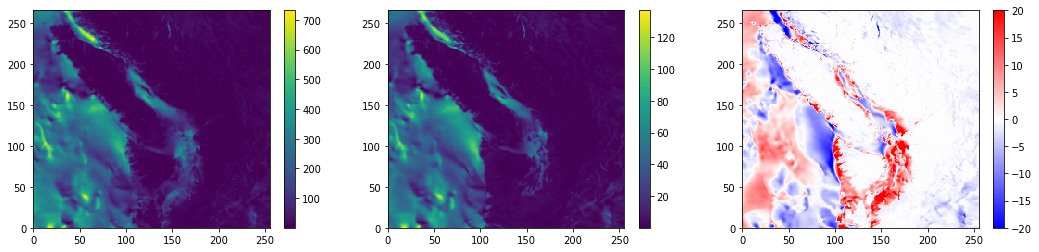

In [239]:
fig, axs = plt.subplots(1, 3, figsize=(18, 4))
mesh = axs[0].pcolormesh(muu)
fig.colorbar(mesh, ax=axs[0])
opsr = opsdata['u_wind'][io, im:ix, im:ix]**2 + opsdata['v_wind'][io, im:ix, im:ix]**2
mesh = axs[1].pcolormesh(opsr)
fig.colorbar(mesh, ax=axs[1])
factor = 0.175
mesh = axs[2].pcolormesh(muu*factor- opsr, cmap='bwr' , vmax=20, vmin=-20)
fig.colorbar(mesh, ax=axs[2])
print (np.sum(muu*factor - opsr))

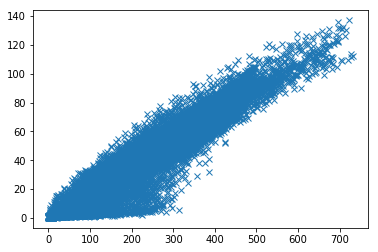

In [240]:
plt.plot(np.ndarray.flatten(muu), np.ndarray.flatten(np.array(opsr)), 'x')

<xarray.DataArray 'u_wind' ()>
array(9417.594693)
Coordinates:
    time_counter  datetime64[ns] 2014-11-02T15:00:00


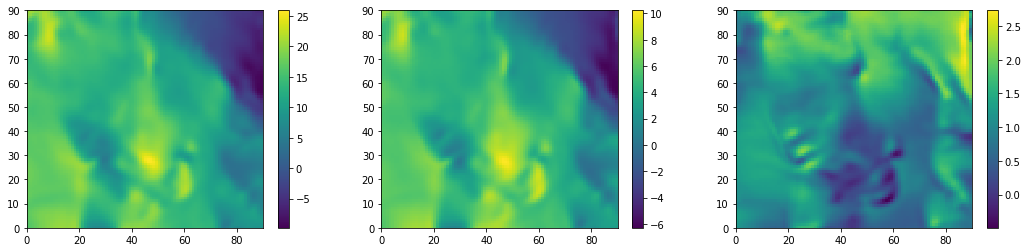

In [106]:
fig, axs = plt.subplots(1, 3, figsize=(18, 4))
mesh = axs[0].pcolormesh(muu)
fig.colorbar(mesh, ax=axs[0])
opsr = opsdata['u_wind'][io, im:ix, im:ix]
mesh = axs[1].pcolormesh(opsr)
fig.colorbar(mesh, ax=axs[1])
factor = np.sqrt(0.175)
mesh = axs[2].pcolormesh(muu*factor- opsr)
fig.colorbar(mesh, ax=axs[2])
print (np.sum(muu*factor - opsr))

In [265]:
ir, io = 13, 15
x = np.ndarray.flatten(np.array(rpndata['nav_lon'][JST:JEN, IST:IEN]))
y = np.ndarray.flatten(np.array(rpndata['nav_lat'][JST:JEN, IST:IEN]))
z = np.ndarray.flatten(np.array(rpndata['TT'][ir, 0, JST:JEN, IST:IEN]+273.15))

In [266]:
im, ix = 0, -1

xnew = opsdata['nav_lon'][im:ix, im:ix]
ynew = opsdata['nav_lat'][im:ix, im:ix]
points = np.array( (x,y)).T
print (points.shape)

muu = interpolate.griddata(points, z, (xnew, ynew))

(68096, 2)


<xarray.DataArray 'tair' ()>
array(161588.759646)
Coordinates:
    time_counter  datetime64[ns] 2014-11-02T15:00:00


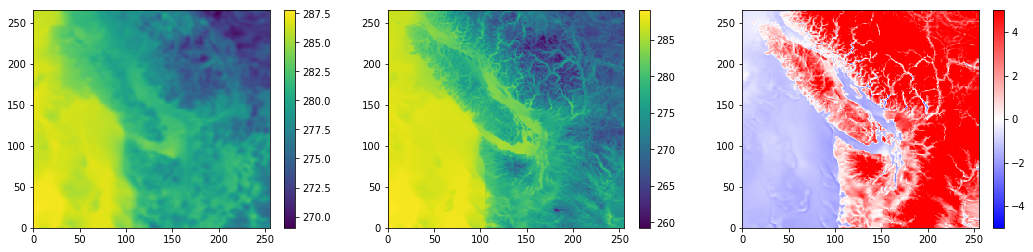

In [267]:
fig, axs = plt.subplots(1, 3, figsize=(18, 4))
mesh = axs[0].pcolormesh(muu)
fig.colorbar(mesh, ax=axs[0])
opsr = opsdata['tair'][io, im:ix, im:ix]
mesh = axs[1].pcolormesh(opsr)
fig.colorbar(mesh, ax=axs[1])
factor = 0
mesh = axs[2].pcolormesh(muu+factor- opsr, cmap='bwr', vmax=5, vmin=-5)
fig.colorbar(mesh, ax=axs[2])
print (np.sum(muu+factor - opsr))

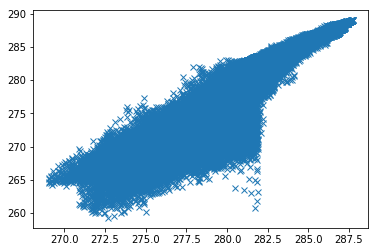

In [244]:
plt.plot(np.ndarray.flatten(muu), np.ndarray.flatten(np.array(opsr)), 'x')

not sure I've got the right temperature

(1, 50, 476, 675)


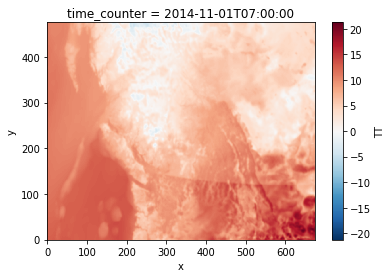

In [143]:
with xr.open_dataset('/data/dlatorne/MEOPAR/test_cstrpn2cdf/2014110106_001.nc.000002') as data:
    print(data['TT'].shape)
    data['TT'][0, 49].plot()

(1, 27, 476, 675)


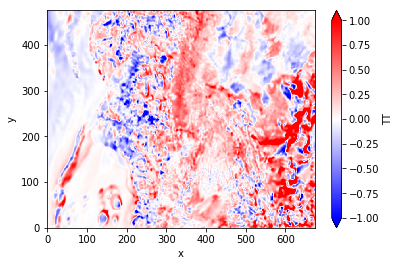

In [149]:
with xr.open_dataset('/data/dlatorne/MEOPAR/test_cstrpn2cdf/2014110106_001.nc.000004') as data2:
    print(data['TT'].shape)
    with xr.open_dataset('/data/dlatorne/MEOPAR/test_cstrpn2cdf/2014110106_001.nc.000002') as data1:
        (data2['TT'][0, 26] - data1['TT'][0, 49]).plot(vmax=1, vmin=-1, cmap='bwr')

# Pressure

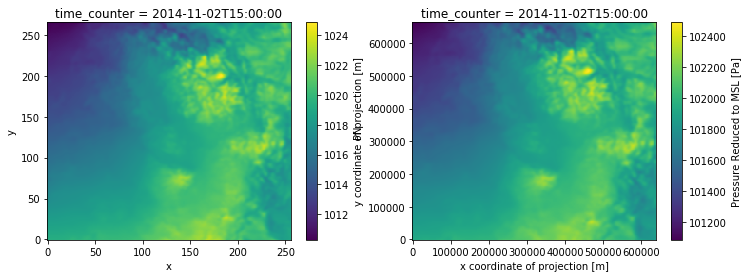

In [186]:
ir, io = 13, 15
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
rpndata['PN'][ir, 0, JST:JEN, IST:IEN].plot(ax=axs[0])
opsdata['atmpres'][io].plot(ax=axs[1])

In [187]:
z = np.ndarray.flatten(np.array(rpndata['PN'][ir, 0, JST:JEN, IST:IEN]))

In [188]:
im, ix = 0, -1

xnew = opsdata['nav_lon'][im:ix, im:ix]
ynew = opsdata['nav_lat'][im:ix, im:ix]
points = np.array( (x,y)).T
print (points.shape)

muu = interpolate.griddata(points, z, (xnew, ynew))

(68096, 2)


<xarray.DataArray 'atmpres' ()>
array(-6.805502e+09)
Coordinates:
    time_counter  datetime64[ns] 2014-11-02T15:00:00


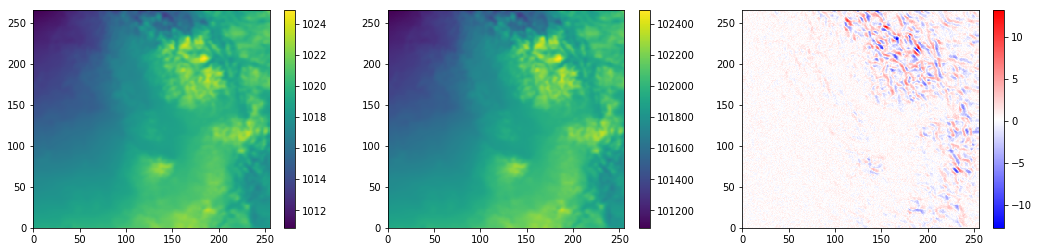

In [189]:
fig, axs = plt.subplots(1, 3, figsize=(18, 4))
mesh = axs[0].pcolormesh(muu)
fig.colorbar(mesh, ax=axs[0])
opsr = opsdata['atmpres'][io, im:ix, im:ix]
mesh = axs[1].pcolormesh(opsr)
fig.colorbar(mesh, ax=axs[1])
factor = 100
mesh = axs[2].pcolormesh(muu*factor- opsr, cmap='bwr')
fig.colorbar(mesh, ax=axs[2])
print (np.sum(muu+factor - opsr))

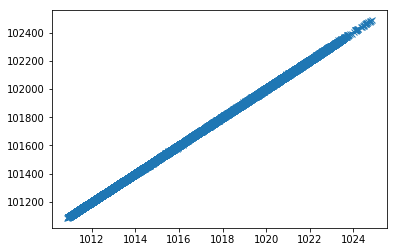

In [190]:
plt.plot(np.ndarray.flatten(muu), np.ndarray.flatten(np.array(opsr)), 'x')

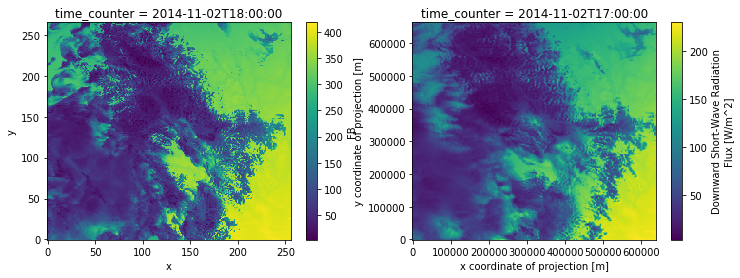

In [233]:
ir, io = 15, 17
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
rpndata['FB'][ir, 0, JST:JEN, IST:IEN].plot(ax=axs[0])
opsdata['solar'][io].plot(ax=axs[1])

In [234]:
z = np.ndarray.flatten(np.array(rpndata['FB'][ir, 0, JST:JEN, IST:IEN]))
im, ix = 0, -1

xnew = opsdata['nav_lon'][im:ix, im:ix]
ynew = opsdata['nav_lat'][im:ix, im:ix]
points = np.array( (x,y)).T
print (points.shape)

muu = interpolate.griddata(points, z, (xnew, ynew))

(68096, 2)


<xarray.DataArray 'solar' ()>
array(-3043893.894876)
Coordinates:
    time_counter  datetime64[ns] 2014-11-02T17:00:00


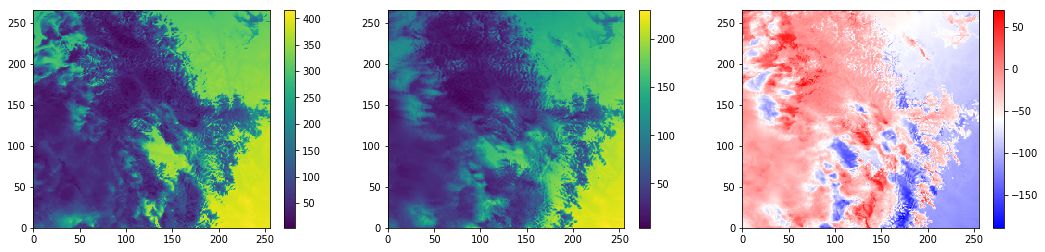

In [235]:
fig, axs = plt.subplots(1, 3, figsize=(18, 4))
mesh = axs[0].pcolormesh(muu)
fig.colorbar(mesh, ax=axs[0])
opsr = opsdata['solar'][io, im:ix, im:ix]
mesh = axs[1].pcolormesh(opsr)
fig.colorbar(mesh, ax=axs[1])
factor =80/300.
mesh = axs[2].pcolormesh(muu*factor- opsr, cmap='bwr')
fig.colorbar(mesh, ax=axs[2])
print (np.sum(muu*factor - opsr))

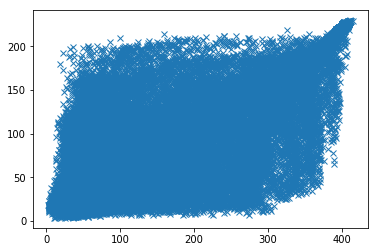

In [236]:
plt.plot(np.ndarray.flatten(muu), np.ndarray.flatten(np.array(opsr)), 'x')

In [245]:
pramod = xr.open_dataset('/ocean/dlatorne/MEOPAR/GEM2.5/NorthCoast/201212-TMP_Salish.nc')

In [246]:
pramod

<xarray.Dataset>
Dimensions:            (time: 806, x: 228, y: 267)
Coordinates:
    longitude          (y, x) float64 ...
    latitude           (y, x) float64 ...
  * time               (time) datetime64[ns] 2012-12-01T06:00:00 ... 2013-01-01T06:00:00
Dimensions without coordinates: x, y
Data variables:
    TMP_2maboveground  (time, y, x) float32 ...
Attributes:
    CDI:                  Climate Data Interface version 1.6.3 (http://code.z...
    Conventions:          CF-1.0
    history:              Fri Jul 18 01:04:22 2014: C:\cygwin64\home\ThupakiP...
    History:              created by wgrib2
    GRIB2_grid_template:  20
    CDO:                  Climate Data Operators version 1.6.3 (http://code.z...

(266, 256) (266, 256)


(234.4, 234.6)

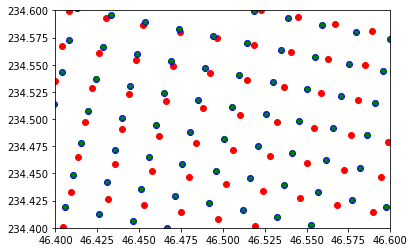

In [253]:
plt.plot(rpndata['nav_lat'][JST:JEN, IST:IEN], rpndata['nav_lon'][JST:JEN, IST:IEN], 'or');
plt.plot(opsdata['nav_lat'], opsdata['nav_lon'], 'ob')
plt.plot(pramod['latitude'], pramod['longitude'], '*g')
print (rpndata['nav_lat'][JST:JEN, IST:IEN].shape, opsdata['nav_lat'].shape)
plt.xlim((46.4, 46.6))
plt.ylim(234.4, 234.6)

So Pramod's 2012 files are on the same grid as our files!

In [258]:
screen = xr.open_dataset('../../screen.nc')['TMP_2maboveground'][0,:]
p1000 = xr.open_dataset('../../p1000.nc')['TMP_1000mb'][0,:]

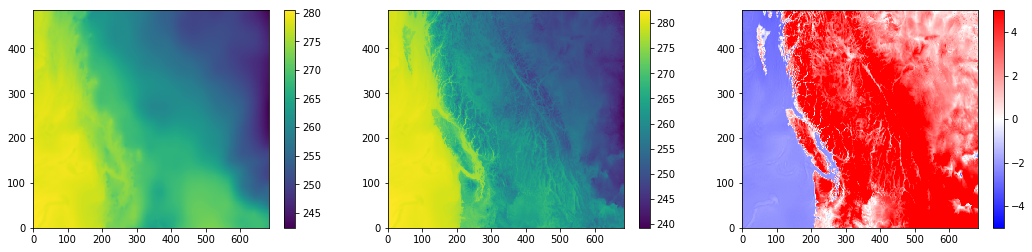

In [261]:
fig, axs = plt.subplots(1, 3, figsize=(18, 4))
mesh = axs[1].pcolormesh(screen)
fig.colorbar(mesh, ax=axs[1])
mesh = axs[0].pcolormesh(p1000)
fig.colorbar(mesh, ax=axs[0])
mesh = axs[2].pcolormesh(-screen + p1000, cmap='bwr', vmax=5, vmin=-5)
fig.colorbar(mesh, ax=axs[2])

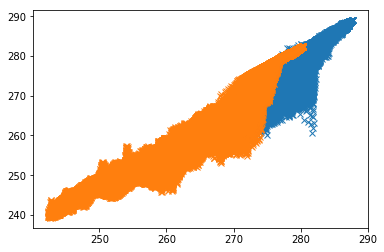

In [269]:
plt.plot(np.ndarray.flatten(muu), np.ndarray.flatten(np.array(opsr)), 'x')
plt.plot(np.ndarray.flatten(np.array(p1000)), np.ndarray.flatten(np.array(screen)), 'x')
